In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [80]:
# Cargar el dataset
df = pd.read_csv("../data/students_stress_level_cleaned.csv")

In [81]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,Psychological_Score,Environmental_Score,Academic_Score,Social_Score,Physiological_Score
0,14,20,0,11,2,1,2,4,2,3,...,2,3,3,2,1,17.0,2.50,2.666667,2.50,2.666667
1,15,8,1,15,5,3,1,4,3,1,...,1,4,5,5,2,11.5,2.00,2.000000,3.75,3.333333
2,12,18,1,14,2,1,2,2,2,2,...,2,3,2,2,1,15.0,2.25,2.666667,2.25,2.000000
3,16,12,1,15,4,3,1,3,4,2,...,1,4,4,5,2,14.0,2.50,2.333333,3.50,2.666667
4,20,13,1,21,3,3,1,4,3,2,...,1,4,4,5,2,16.5,2.00,3.000000,3.50,2.666667


In [82]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 996 non-null    int64  
 1   self_esteem                   996 non-null    int64  
 2   mental_health_history         996 non-null    int64  
 3   depression                    996 non-null    int64  
 4   headache                      996 non-null    int64  
 5   blood_pressure                996 non-null    int64  
 6   sleep_quality                 996 non-null    int64  
 7   breathing_problem             996 non-null    int64  
 8   noise_level                   996 non-null    int64  
 9   living_conditions             996 non-null    int64  
 10  safety                        996 non-null    int64  
 11  basic_needs                   996 non-null    int64  
 12  academic_performance          996 non

In [83]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
anxiety_level                     int64
self_esteem                       int64
mental_health_history             int64
depression                        int64
headache                          int64
blood_pressure                    int64
sleep_quality                     int64
breathing_problem                 int64
noise_level                       int64
living_conditions                 int64
safety                            int64
basic_needs                       int64
academic_performance              int64
study_load                        int64
teacher_student_relationship      int64
future_career_concerns            int64
social_support                    int64
peer_pressure                     int64
extracurricular_activities        int64
bullying                          int64
stress_level                      int64
Psychological_Score             float64
Environmental_Score             float64
Academic_Score                  float64
Social_S

In [84]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,Psychological_Score,Environmental_Score,Academic_Score,Social_Score,Physiological_Score
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,11.143574,18.340361,0.493976,12.557229,2.503012,2.096386,2.666667,2.776104,2.665663,2.525100,...,2.019076,2.764056,2.783133,2.618474,0.985944,14.741968,2.698544,2.737617,2.546185,2.648594
std,6.082058,8.666554,0.500215,7.680801,1.353570,0.830782,1.502873,1.353600,1.275854,1.049706,...,0.993768,1.380974,1.377185,1.500090,0.816786,2.492136,0.653114,0.633239,0.819211,0.464613
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.750000,1.000000,0.000000,1.666667
25%,6.000000,12.000000,0.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,0.000000,13.000000,2.250000,2.333333,1.750000,2.333333
50%,11.000000,20.000000,0.000000,12.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,2.500000,2.666667,2.500000,2.666667
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,2.000000,16.500000,3.250000,3.333333,3.500000,3.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,5.000000,5.000000,5.000000,2.000000,21.500000,4.250000,4.666667,4.000000,4.000000


In [85]:
# Mostrar media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
anxiety_level                   11.143574
self_esteem                     18.340361
mental_health_history            0.493976
depression                      12.557229
headache                         2.503012
blood_pressure                   2.096386
sleep_quality                    2.666667
breathing_problem                2.776104
noise_level                      2.665663
living_conditions                2.525100
safety                           2.787149
basic_needs                      2.816265
academic_performance             2.816265
study_load                       2.657631
teacher_student_relationship     2.738956
future_career_concerns           2.641566
social_support                   2.019076
peer_pressure                    2.764056
extracurricular_activities       2.783133
bullying                         2.618474
stress_level                     0.985944
Psychological_Score             14.741968
Environmental_Score              2.6

In [86]:
# Mostrar la varianza y desviación estándar de las características numéricas
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
anxiety_level                   36.991426
self_esteem                     75.109163
mental_health_history            0.250215
depression                      58.994712
headache                         1.832152
blood_pressure                   0.690198
sleep_quality                    2.258626
breathing_problem                1.832232
noise_level                      1.627805
living_conditions                1.101882
safety                           1.912438
basic_needs                      1.957162
academic_performance             1.904901
study_load                       1.533922
teacher_student_relationship     1.843345
future_career_concerns           2.308582
social_support                   0.987575
peer_pressure                    1.907089
extracurricular_activities       1.896640
bullying                         2.250271
stress_level                     0.667139
Psychological_Score              6.210739
Environmental_Score              

In [87]:
# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numerical_columns)

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level',
       'Psychological_Score', 'Environmental_Score', 'Academic_Score',
       'Social_Score', 'Physiological_Score'],
      dtype='object')
Columnas categóricas: Index([], dtype='object')


In [88]:
# Preparación de los datos

# Selección de variables más relevantes para el modelo
selected_features = [
    'Psychological_Score',
    'Environmental_Score',
    'Academic_Score',
    'Social_Score',
    'Physiological_Score'
]

# Separar X e y con las variables seleccionadas
X = df[selected_features]
y = df['stress_level']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar las variables numéricas
scaler = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrames si lo necesitas
X_train = pd.DataFrame(X_train_scaled, columns=selected_features, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=selected_features, index=X_test.index)

# Mostrar tamaños de los conjuntos
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (796, 5), (796,)
Datos de prueba: (200, 5), (200,)


In [89]:
# Modelos de clasificación
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluar los modelos con métricas de clasificación
classification_metrics = {}

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Guardar métricas
    classification_metrics[name] = {
        "Accuracy": acc,
        "F1 Score (weighted)": f1,
        "Classification Report": report
    }

# Mostrar las métricas de clasificación
for name, metrics in classification_metrics.items():
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score (weighted): {metrics['F1 Score (weighted)']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])

c:\Users\juanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Logistic Regression Metrics:
Accuracy: 0.9450
F1 Score (weighted): 0.9449
Classification Report:
{'0': {'precision': 0.9571428571428572, 'recall': 0.9852941176470589, 'f1-score': 0.9710144927536232, 'support': 68.0}, '1': {'precision': 0.8904109589041096, 'recall': 0.9701492537313433, 'f1-score': 0.9285714285714286, 'support': 67.0}, '2': {'precision': 1.0, 'recall': 0.8769230769230769, 'f1-score': 0.9344262295081968, 'support': 65.0}, 'accuracy': 0.945, 'macro avg': {'precision': 0.949184605348989, 'recall': 0.9441221494338263, 'f1-score': 0.9446707169444162, 'support': 200.0}, 'weighted avg': {'precision': 0.9487162426614482, 'recall': 0.945, 'f1-score': 0.9449048806978244, 'support': 200.0}}

Random Forest Metrics:
Accuracy: 0.9450
F1 Score (weighted): 0.9447
Classification Report:
{'0': {'precision': 0.9154929577464789, 'recall': 0.9558823529411765, 'f1-score': 0.935251798561151, 'support': 68.0}, '1': {'precision': 0.9565217391304348, 'recall': 0.9850746268656716, 'f1-score': 0.9

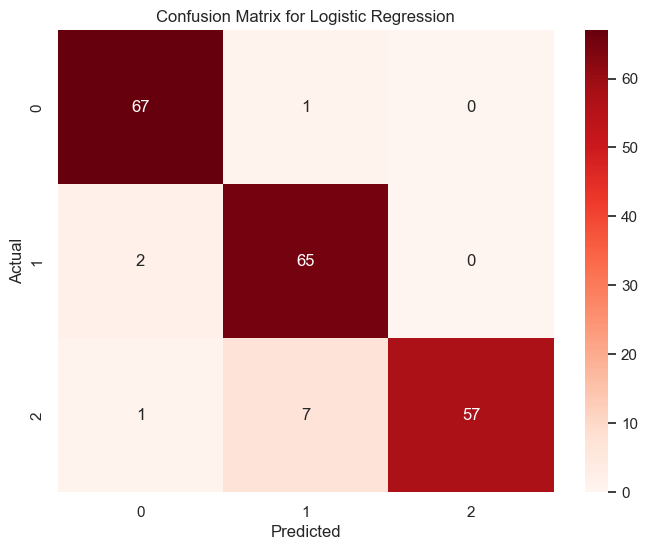

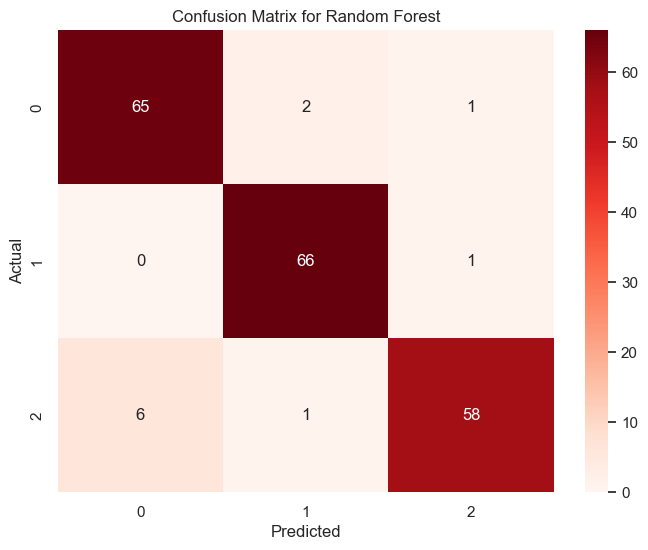

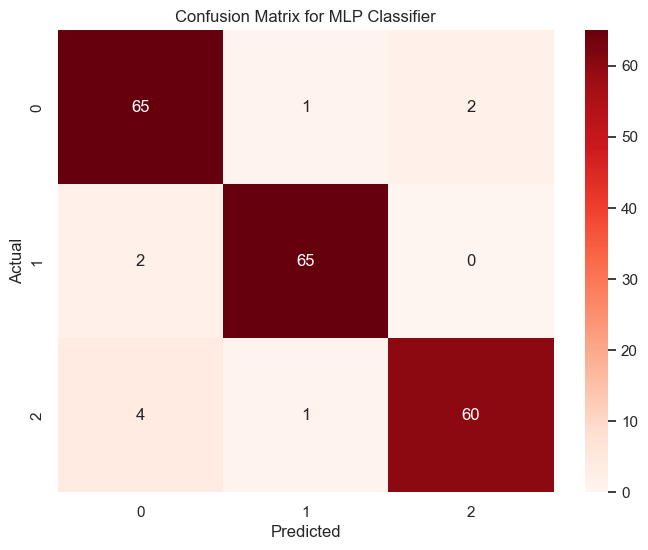

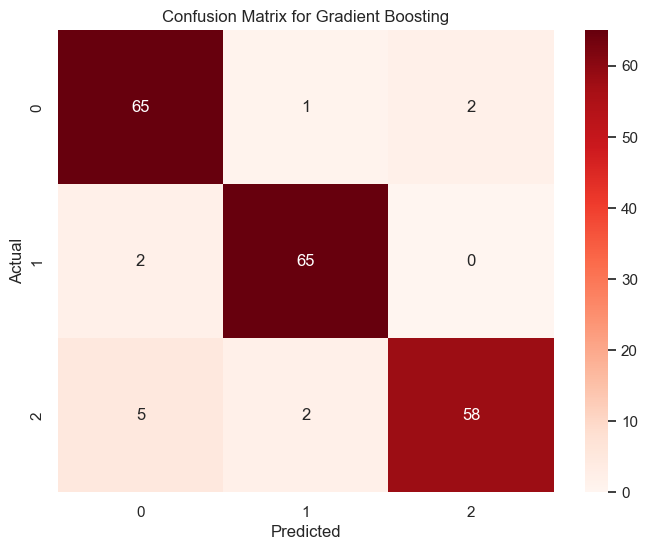

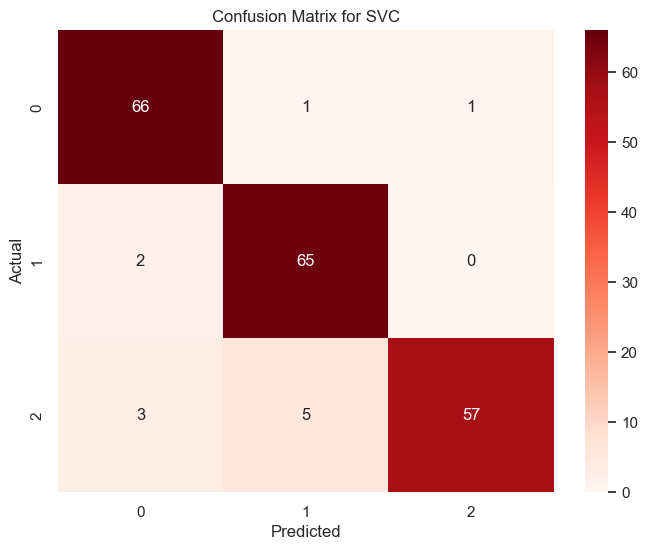

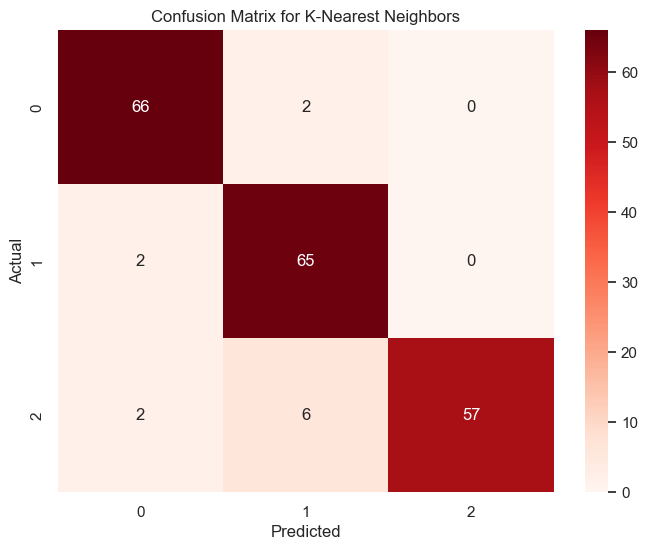

In [90]:
# Mostrar las matrices de confusión de los modelos
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

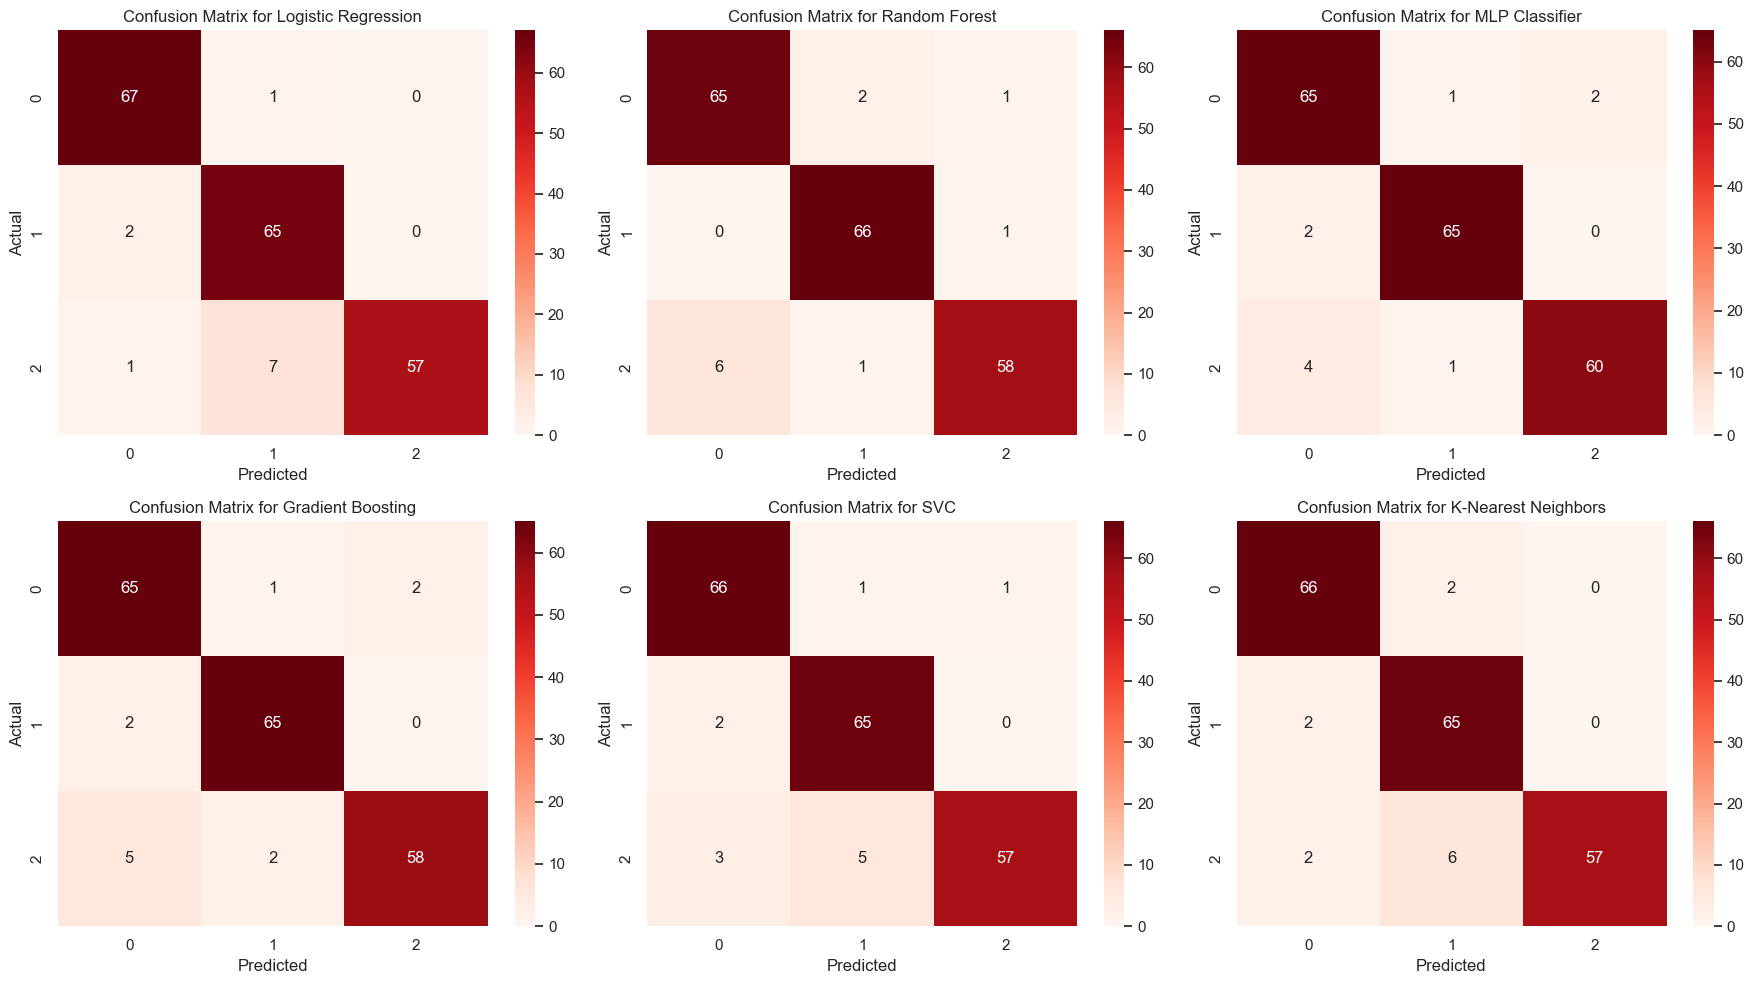

In [94]:
# Graficar las matrices de confusión en un solo gráfico
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax)
        ax.set_title(f'Confusion Matrix for {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
plot_confusion_matrices(models, X_test, y_test)

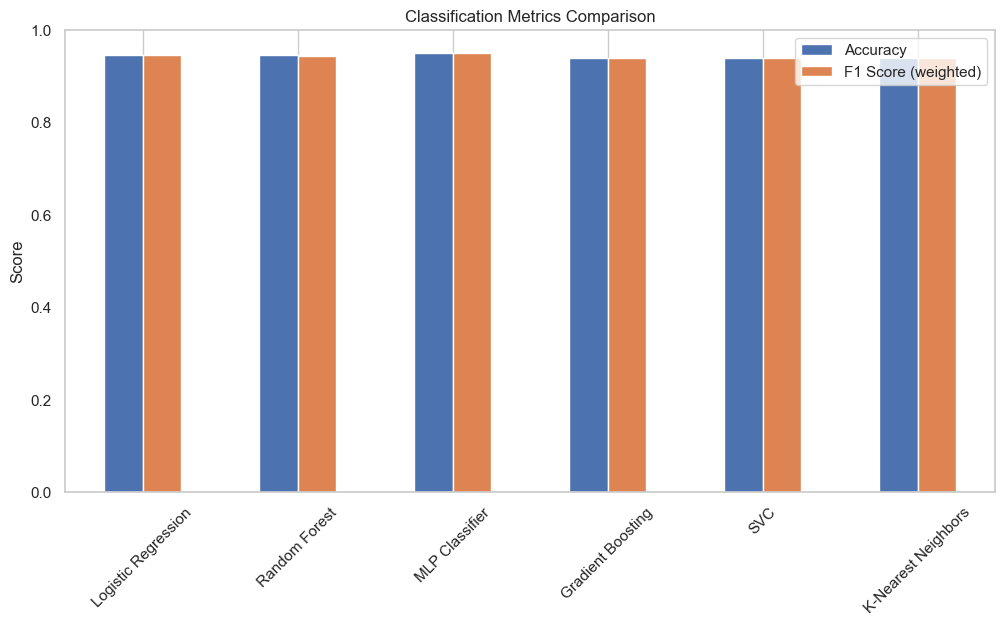

In [91]:
# Grafico de barras de las métricas de clasificación
def plot_classification_metrics(metrics):
    df_metrics = pd.DataFrame(metrics).T
    df_metrics = df_metrics[['Accuracy', 'F1 Score (weighted)']]
    
    df_metrics.plot(kind='bar', figsize=(12, 6))
    plt.title('Classification Metrics Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

plot_classification_metrics(classification_metrics)

In [92]:
#  Modelos de regresión
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Evaluar los modelos con métricas de regresión mse y r2 score
regression_metrics = {}

for name, model in regression_models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar métricas
    regression_metrics[name] = {
        "MSE": mse,
        "R2 Score": r2
    }

# Mostrar las métricas de regresión
for name, metrics in regression_metrics.items():
    print(f"\n{name} Metrics:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")


Linear Regression Metrics:
MSE: 0.1084
R2 Score: 0.8369

Random Forest Regressor Metrics:
MSE: 0.1093
R2 Score: 0.8355

MLP Regressor Metrics:
MSE: 0.0998
R2 Score: 0.8498

K-Nearest Neighbors Regressor Metrics:
MSE: 0.0964
R2 Score: 0.8550

Gradient Boosting Regressor Metrics:
MSE: 0.1034
R2 Score: 0.8444


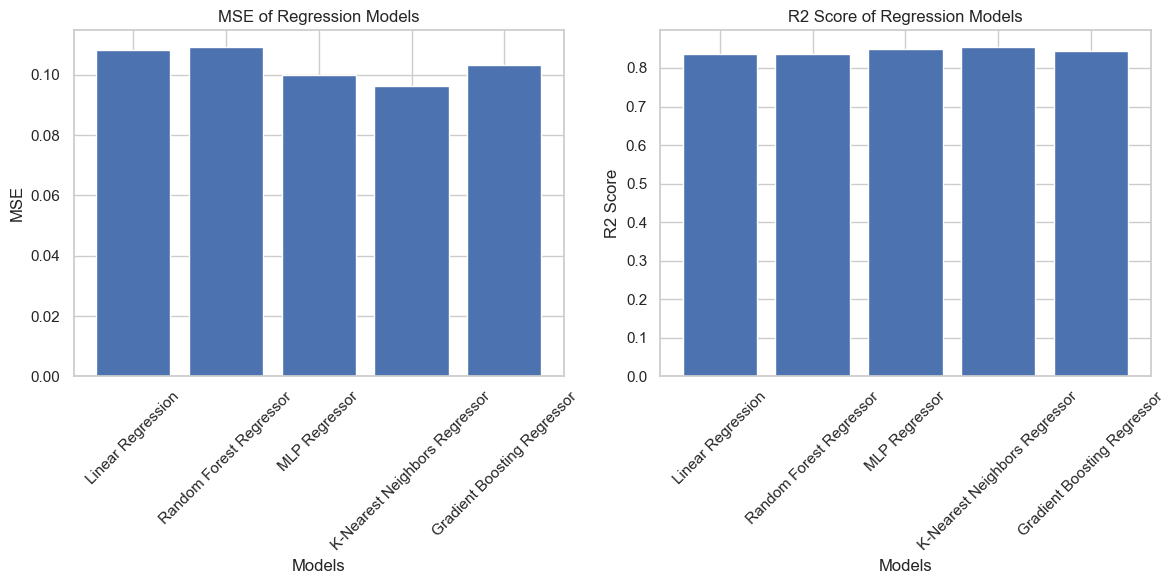

In [93]:
# Mostrar las gráficas de mse y r2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(regression_metrics.keys(), [metrics['MSE'] for metrics in regression_metrics.values()])
plt.title('MSE of Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(regression_metrics.keys(), [metrics['R2 Score'] for metrics in regression_metrics.values()])
plt.title('R2 Score of Regression Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()